In [54]:
from __future__ import division
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from datetime import datetime
import logging
from matplotlib.pyplot import figure
from matplotlib.pyplot import *

In [55]:
logging_levels = ["off", "errors", "warning", "debug", "info"]

logging_level = logging_levels[4]

In [56]:
class Ising():

    def __init__(self, width=10, height=10, shape="rect"):
        self.shape = shape
        
        if shape == "rect":
            self.width = width
            self.height = height

        elif shape == "circle":
            self.radius = None
        
        self.init_lattice()
    
    def init_lattice(self):
        if self.shape == "rect":
            self.lattice = 2*np.random.randint(2, size=(self.width,self.height))-1
    
    def metropolis(self, beta):
        for k in range(self.width):
            for l in range(self.height):
                a = np.random.randint(0, self.width)
                b = np.random.randint(0, self.height)
                s = self.lattice[a,b]
                neighbours = self.lattice[(a+1)%self.width, b] + self.lattice[a,(b+1)%self.height] + self.lattice[(a-1)%self.width, b] + self.lattice[a,(b-1)%self.height]
                dE=2*neighbours*s           
                if dE<=0:                   
                    s=-1.0*s
                elif rand() < np.exp(-dE*beta):    
                    s=-1.0*s
                self.lattice[a,b]=s    
        return self.lattice

    def simulation(self, temperature):
        #temperature= 2.6
        #logger.info('dimension of the square lattice is {}x{}'.format(N, N))
        #logger.info('Temperature {} J/kb'.format(temperature)) 
        self.init_lattice()
        f = plt.figure(figsize=(15, 15), dpi=100) 
        self.configurationplot(f, 0, 1)
        
        for i in range(1001):
            self.metropolis(1.0/temperature)
            if i == 1:       
                self.configurationplot(f, i, 2)
            #if i == 4:       
                #self.configurationplot(f, i, 3)
            if i == 32:      
                self.configurationplot(f, i, 3)
            #if i == 100:     
                #self.configurationplot(f, i, 5)
            if i == 1000:    
                self.configurationplot(f, i, 4)
                plt.savefig('Ising_01.png')
        plt.show()
                
    def configurationplot(self, f, i, n):
        
        X, Y = np.meshgrid(range(self.width), range(self.height))
        sp =  f.add_subplot(2, 2, n)  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, self.lattice, cmap=plt.cm.RdBu)
        plt.title('Time={} and temperature={} J/kb'.format(i, temperature), size=20) 
        plt.axis('tight') 
        

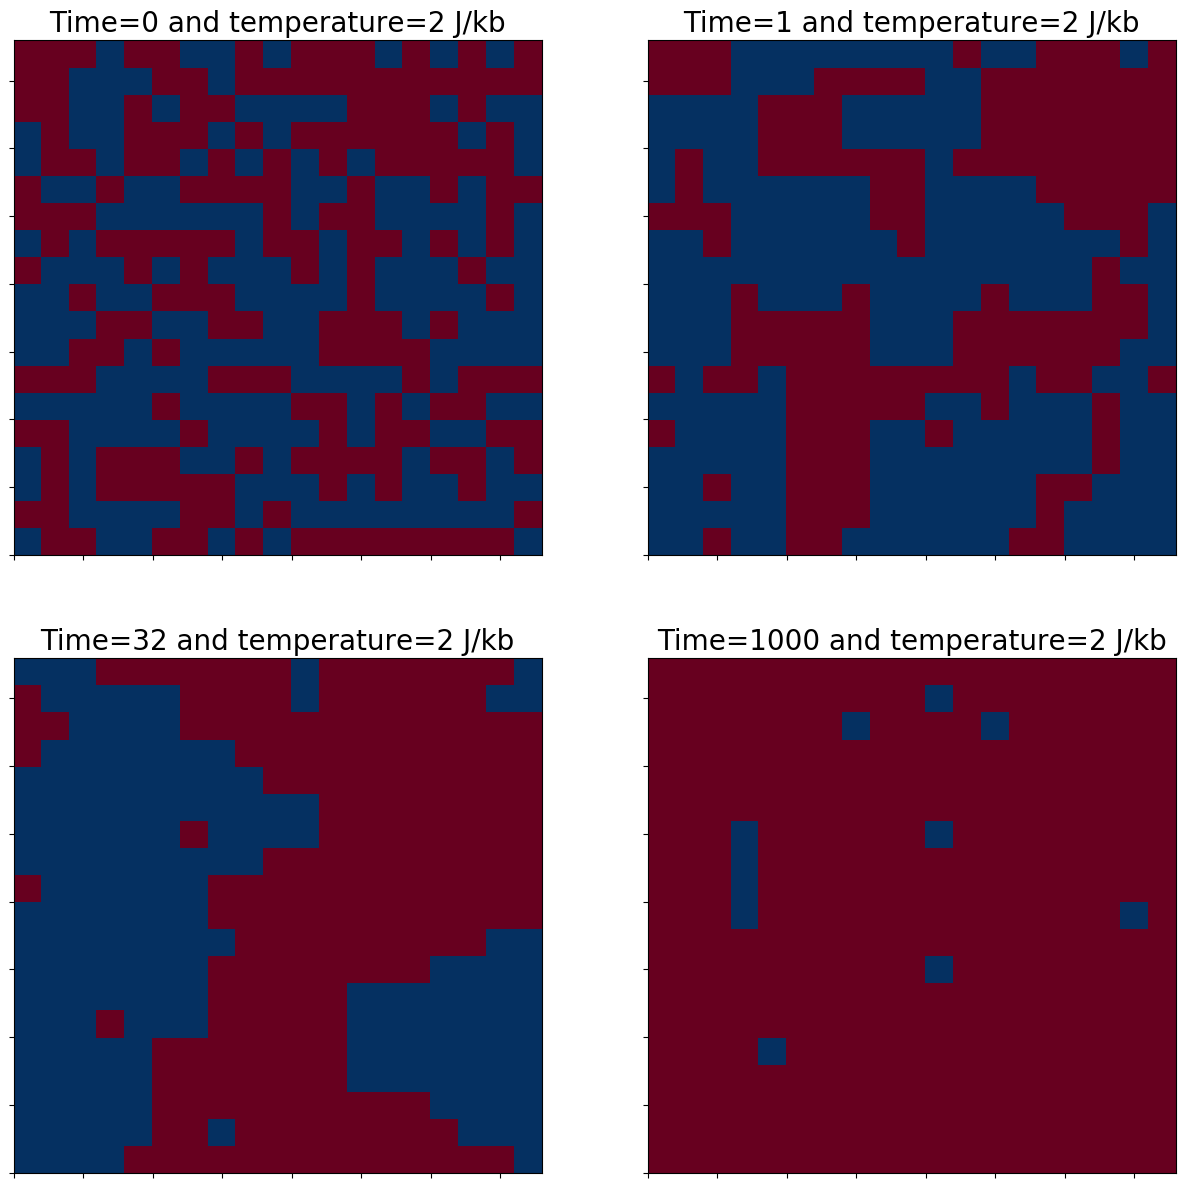

In [57]:
model = Ising(width=20, height=20)
temperature=2
model.simulation(temperature)
